## Calculate sea ice area anomalies in NP,01 and HaddISST

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots

#from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw

from dask.distributed import Client
import matplotlib.path as mpath
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
client = Client(n_workers=4)
client

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:37309 Dashboard: /proxy/37929/status,Cluster Workers: 4 Cores: 96 Memory: 1.60 TB


In [3]:
hgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
area_t = nc.variables['area_t'][:]
xt_ocean = nc.variables['xt_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
nc.close() # close the file
print(area_t.shape)


(1080, 1440)


In [4]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'

#plot stamps of sea ice concentration.
Ocean_File = os.path.join(NYFCntrlDir,'ice.CN.Tdim.cat.all.nc'); #'Tdim_output197*/ice__*.nc')
cntrl_i_np=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time',decode_times=False)
print(cntrl_i_np.CN.shape)

cntrl_i_np_cn=cntrl_i_np.CN.sum('ct').compute()
cntrl_i_np_cn

(120, 5, 1080, 1440)


<xarray.DataArray 'CN' (time: 120, yt: 1080, xt: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.7 -279.4 -279.2 ... 79.42 79.65 79.88
  * yt       (yt) float64 -81.08 -80.97 -80.87 -80.76 ... 78.84 78.84 78.85
Dimensions without coordinates: time

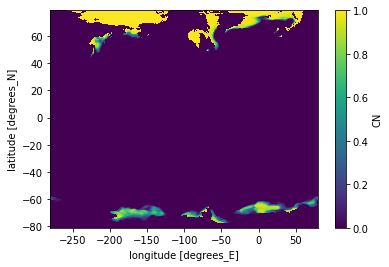

In [50]:
cntrl_i_np_cn[0].plot()

In [51]:
Ocean_File = os.path.join(NYFCntrlDir,'ice.CN.cat.80sto10s.all.nc')
print(Ocean_File)
cntrl2_i_np=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
#cntrl2_i.rename({'time': 'Time'})
print(cntrl2_i_np.CN.shape)
cntrl2_i_np_cn=cntrl2_i_np.CN.sum('ct').compute()
cntrl2_i_np_cn

/g/data/v45/pas561/mom/archive/wombat_jun16z/ice.CN.cat.80sto10s.all.nc
(480, 5, 1080, 1440)


<xarray.DataArray 'CN' (time: 480, yt: 1080, xt: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.7 -279.4 -279.2 ... 79.42 79.65 79.88
  * yt       (yt) float64 -81.08 -80.97 -80.87 -80.76 ... 78.84 78.84 78.85
  * time     (time) float64 7.302e+04 7.304e+04 ... 7.295e+04 7.298e+04

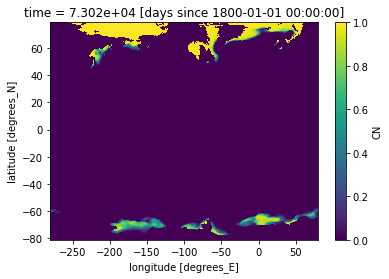

In [52]:
cntrl2_i_np_cn[0].plot()

In [53]:
cntrl_np_cn=np.concatenate((cntrl_i_np_cn,cntrl2_i_np_cn),axis=0)
print(cntrl_np_cn.shape)

tmp=np.array(np.split(cntrl_np_cn,50))
print(tmp.shape)
cntrl_np_cn_ann=np.mean(tmp,axis=1)
cntrl_np_cn_ann_area=cntrl_np_cn_ann*area_t
print(cntrl_np_cn_ann_area.shape)

(600, 1080, 1440)
(50, 12, 1080, 1440)
(50, 1080, 1440)


In [54]:
#version one saved npz file
print(yt_ocean[300],xt_ocean[870],xt_ocean[1276])

-44.19977917334686 -62.375 39.125


In [55]:
lat_ind1 = np.abs(yt_ocean - -44.2).argmin()
lon_ind1 = np.abs(xt_ocean - -39.5).argmin()
lon_ind2 = np.abs(xt_ocean - 20.5).argmin()
print(yt_ocean[lat_ind1],xt_ocean[lon_ind1],xt_ocean[lon_ind2])

-44.19977917334686 -39.625 20.375


In [56]:
print(yt_ocean[300],xt_ocean[870],xt_ocean[1276])
print(yt_ocean[lat_ind1],xt_ocean[lon_ind1],xt_ocean[lon_ind2])
cntrl_np_cn_ann_area_wed=np.sum(np.sum(cntrl_np_cn_ann_area[:,0:lat_ind1,lon_ind1:lon_ind2],axis=1),axis=1)/1000/1000
cntrl_np_cn_ann_area_wed.shape

-44.19977917334686 -62.375 39.125
-44.19977917334686 -39.625 20.375


(50,)

In [57]:
#test np.split ... which seems to mess up the pertubation 
#pert uses ncra --mro -O -d time,0,,12,12 to get annual averages instead of np.split
#but the nco command doesn;t work for control (only get full tavg
#so test the control np.split by comparing to tavg
Ocean_File = os.path.join(NYFCntrlDir,'ice.CN.Tdim.cat.all.ncra.nc')
print(Ocean_File)
tst_np=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
#cntrl2_i.rename({'time': 'Time'})
print(tst_np.CN.shape)
tst_np_cn=tst_np.CN.sum('ct').compute()*area_t

print(yt_ocean[300],xt_ocean[870],xt_ocean[1276])
tst_np_cn_area_wed=np.sum(np.sum(tst_np_cn[:,0:300,870:1276],axis=1),axis=1)/1000/1000
print(tst_np_cn_area_wed.shape)
print(tst_np_cn_area_wed,np.mean(cntrl_np_cn_ann_area_wed))

/g/data/v45/pas561/mom/archive/wombat_jun16z/ice.CN.Tdim.cat.all.ncra.nc
(1, 5, 1080, 1440)
-44.19977917334686 -62.375 39.125
(1,)
<xarray.DataArray 'CN' (time: 1)>
array([4310004.5], dtype=float32)
Dimensions without coordinates: time 2685719.04


In [58]:
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

Ocean_File = os.path.join(NYFPertDir,'ice.cat.ann.nc')
pert_i_np=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
#pert_i_np=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time',decode_times=False)
print(pert_i_np.CN.shape)

(51, 5, 1080, 1440)


In [59]:
#wed_mask = grid_np.ht.where(~xr.ufuncs.isfinite(grid_np.ht.where(grid_np.yt_ocean>-40)))
#wed_mask=wed_mask.where(~xr.ufuncs.isfinite(wed_mask.where(grid_np.xt_ocean<-62)))
#wed_mask=wed_mask.where(~xr.ufuncs.isfinite(wed_mask.where(grid_np.xt_ocean>40)))
#wed_mask = ~xr.ufuncs.isnan(wed_mask).to_dataset(name='wed_mask')
#wed_mask.wed_mask.plot()

In [60]:
pert_np_cn=pert_i_np.CN.sum('ct').compute()
pert_np_cn

<xarray.DataArray 'CN' (Time: 51, yt: 1080, xt: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.7 -279.4 -279.2 ... 79.42 79.65 79.88
  * yt       (yt) float64 -81.08 -80.97 -80.87 -80.76 ... 78.84 78.84 78.85
  * Time     (Time) float64 6.333e+04 6.369e+04 ... 8.121e+04 8.158e+04

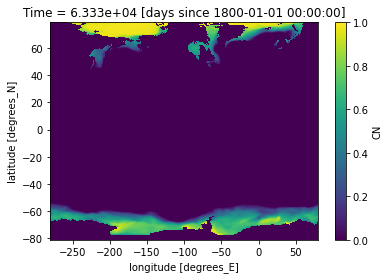

In [61]:
pert_np_cn[0].plot()

In [62]:
#tmp=np.array(pert_np_cn)
#print(tmp.shape)
#tmp=tmp.reshape(12,51,1080,1440)
#print(tmp.shape)
#pert_np_cn_ann=np.mean(tmp,axis=0)
#pert_np_cn_ann_area=pert_np_cn_ann*area_t
#print(pert_np_cn_ann_area.shape)

pert_np_cn_ann_area=pert_np_cn*area_t

In [63]:
#tmp=np.array(np.split(pert_np_cn,12))
#print(tmp.shape)
#pert_np_cn_ann=np.mean(tmp,axis=0)
#pert_np_cn_ann_area=pert_np_cn_ann*area_t
#print(pert_np_cn_ann_area.shape)

[2000]
[0.2]


Text(0.5, 0, 'Ice Area')

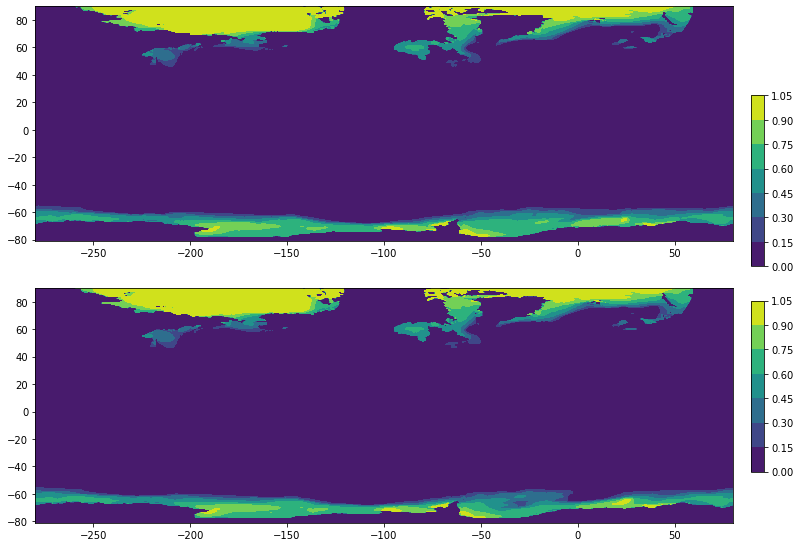

In [64]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('b) MOM025_NoNP')

clev3 = np.arange(2000,2001,1000)
print(clev3)

clev2 = np.arange(0.20,0.21,1)
print(clev2)
        
plt.subplot(2,1,1)
plt.gca().patch.set_color('.75')
p1=plt.contourf(xt_ocean,yt_ocean,pert_np_cn[0])

ax3 = plt.axes([0.92,0.5,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Ice Conc')

plt.subplot(2,1,2)
plt.gca().patch.set_color('.75')
p1=plt.contourf(xt_ocean,yt_ocean,pert_np_cn[2])

ax3 = plt.axes([0.92,0.2,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Ice Area')



In [65]:
print(yt_ocean[300],xt_ocean[870],xt_ocean[1276])
print(yt_ocean[lat_ind1],xt_ocean[lon_ind1],xt_ocean[lon_ind2])
pert_np_cn_ann_area_wed=np.sum(np.sum(pert_np_cn_ann_area[:,0:lat_ind1,lon_ind1:lon_ind2],axis=1),axis=1)/1000/1000
pert_np_cn_ann_area_wed.shape

-44.19977917334686 -62.375 39.125
-44.19977917334686 -39.625 20.375


(51,)

In [66]:
pert_np_cn_ann_area_wed

<xarray.DataArray 'CN' (Time: 51)>
array([2393574.5, 1949500.1, 1739554. , 1958692.5, 2291799. , 2543561. ,
       2694841.5, 2768113.2, 2785070. , 2792107.8, 2794753.5, 2792617.2,
       2798127.2, 2816430. , 2839769.8, 2859363.2, 2869162.8, 2874482.8,
       2872168. , 2863762.2, 2855396. , 2841199.8, 2822628.5, 2807053.2,
       2791435.8, 2779807.5, 2769948.8, 2762642.5, 2757158. , 2753512.5,
       2748958.5, 2735785. , 2729506.2, 2721693.2, 2716196.5, 2713193.5,
       2713640.2, 2712544. , 2709637.5, 2706638.2, 2705496.8, 2703286.5,
       2707217. , 2709109.8, 2706209. , 2705992.5, 2705014. , 2346940. ,
       1939545.2, 1778033.2, 1734509.9], dtype=float32)
Coordinates:
  * Time     (Time) float64 6.333e+04 6.369e+04 ... 8.121e+04 8.158e+04

In [67]:
#control starts in 1970, pert in 1973 ... make both start in 1970
print(cntrl_np_cn_ann_area_wed.shape,pert_np_cn_ann_area_wed.shape)
#tmp=np.zeros((50,1))
pert_np_cn_ann_area_wed=np.concatenate((cntrl_np_cn_ann_area_wed[0:3],pert_np_cn_ann_area_wed[:]))
tmp.shape

(50,) (51,)


(50, 12, 1080, 1440)

In [68]:
cntrl_np_cn_ann_area_wed.shape

(50,)

In [70]:
fo='/g/data/v45/pas561/mom/archive/wombat_jun16z/cntrl_np_cn_ann_area_wed_1970_'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fo)
np.save(fo,cntrl_np_cn_ann_area_wed.data)

/g/data/v45/pas561/mom/archive/wombat_jun16z/cntrl_np_cn_ann_area_wed_1970_961_1201.npy


In [71]:
fo='/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/pert_np_cn_ann_area_wed_1970_'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fo)
np.save(fo,pert_np_cn_ann_area_wed.data)

/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/pert_np_cn_ann_area_wed_1970_961_1201.npy


In [72]:
fi='/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/pert_np_cn_ann_area_wed_1970_'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
pert_tmp=np.load(fi)

In [73]:
fi='/g/data/v45/pas561/mom/archive/wombat_jun16z/cntrl_np_cn_ann_area_wed_1970_'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fi)
cntrl_tmp=np.load(fi)

/g/data/v45/pas561/mom/archive/wombat_jun16z/cntrl_np_cn_ann_area_wed_1970_961_1201.npy


<Figure size 504x576 with 0 Axes>

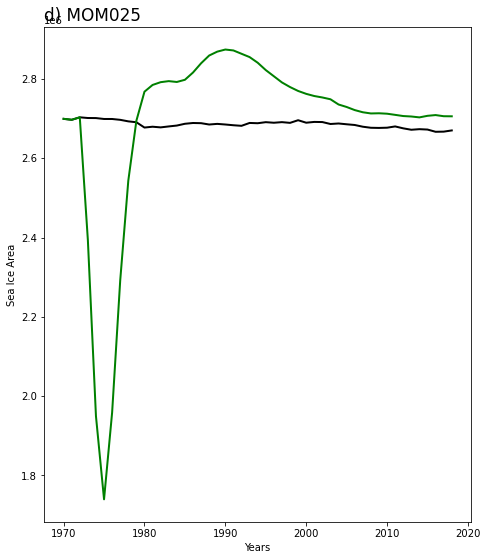

In [74]:
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

fontsize=14

plt.figure(figsize(7,8))

plt.subplots(1, 1)
plt.rcParams['font.size'] = fontsize

yrs=np.arange(1970,2020,1)

plt.plot(yrs[0:49],cntrl_tmp[0:49],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:49],pert_tmp[0:49],linestyle='-',color='g',label='MOM025',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Sea Ice Area')
plt.xlabel('Years')
tit='d) MOM025'
plt.title(tit,loc='left')

plt.tight_layout()

#of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig3c_CN.png'
#plt.savefig(of,dpi=220)

#cbaxes = fig.add_axes([0.95,0.5,0.015,0.2]) 
#cb=fig.colorbar(pcm, ax=axs[0:2],cax=cbaxes,ticks=tick_lvls, shrink=0.6)
#cb.ax.set_xlabel('Conc.')



## do kds75

In [3]:
hgrid_file ='/g/data/v45/pas561/mom/archive/mom01_unmasked_ocean_grid.nc'
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
area_t = nc.variables['area_t'][:]
nc.close() # close the file
print(area_t.shape)

vgrid_file ='/g/data3/hh5/tmp/pas561/kds75_cp/output430/ocean.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean = nc.variables['yt_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
nc.close() # close the file
print(yt_ocean.shape)

(2700, 3600)
(2700,)


In [4]:
NYFCntrlDir='/g/data3/hh5/tmp/pas561/kds75_cp/'
Ocean_File = os.path.join(NYFCntrlDir,'output442/ice_month.nc')
print(Ocean_File)
cntrl_i_01=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
#cntrl2_i.rename({'time': 'Time'})
print(cntrl_i_01.CN.shape)
cntrl_i_01_cn=cntrl_i_01.CN.sum('ct').compute()
cntrl_i_01_cn

/g/data3/hh5/tmp/pas561/kds75_cp/output442/ice_month.nc
(3, 5, 2700, 3600)


<xarray.DataArray 'CN' (time: 3, yt: 2700, xt: 3600)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yt       (yt) float64 -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * time     (time) float64 4.126e+04 4.129e+04 4.132e+04

In [5]:
NYFCntrlDir='/g/data3/hh5/tmp/pas561/kds75_cp/'
Ocean_File = os.path.join(NYFCntrlDir,'CN.cat.nc')
print(Ocean_File)
cntrl2_i_01=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
#cntrl2_i.rename({'time': 'Time'})
print(cntrl2_i_01.CN.shape)
cntrl2_i_01_cn=cntrl2_i_01.CN.sum('ct').compute()
cntrl2_i_01_cn

/g/data3/hh5/tmp/pas561/kds75_cp/CN.cat.nc
(201, 5, 2700, 3600)


<xarray.DataArray 'CN' (time: 201, yt: 2700, xt: 3600)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yt       (yt) float64 -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * time     (time) float64 4.135e+04 4.138e+04 4.141e+04 ... 4.74e+04 4.743e+04

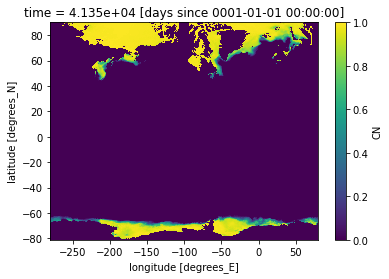

In [6]:
cntrl2_i_01_cn[0].plot()

In [7]:
cntrl_01_cn=np.concatenate((cntrl_i_01_cn,cntrl2_i_01_cn),axis=0)
print(cntrl_01_cn.shape)

(204, 2700, 3600)


In [8]:
tmp=np.array(np.split(cntrl_01_cn,17))
print(tmp.shape)
cntrl_01_cn_ann=np.mean(tmp,axis=1)
np.save('/g/data3/hh5/tmp/pas561/kds75_cp/CN.ann.npy',cntrl_01_cn_ann)

(17, 12, 2700, 3600)


In [9]:
cntrl_01_cn_ann_area=cntrl_01_cn_ann*area_t
print(cntrl_01_cn_ann_area.shape)

(17, 2700, 3600)


In [10]:
#-44.19977917334686 -62.375 39.125
print(yt_ocean[750],xt_ocean[2176],xt_ocean[3191])

-44.25346444070827 -62.35000000000548 39.14999999999545


In [11]:
#-44.19977917334686 -62.375 39.125
lat_ind1 = np.abs(yt_ocean - -44.2).argmin()
lon_ind1 = np.abs(xt_ocean - -39.5).argmin()
lon_ind2 = np.abs(xt_ocean - 20.5).argmin()
print(yt_ocean[lat_ind1],xt_ocean[lon_ind1],xt_ocean[lon_ind2])
cntrl_01_cn_ann_area_wed=np.sum(np.sum(cntrl_01_cn_ann_area[:,0:lat_ind1,lon_ind1:lon_ind2],axis=2),axis=1)/1000/1000
cntrl_01_cn_ann_area_wed.shape

-44.18179490046996 -39.45000000000512 20.549999999995194


(17,)

In [12]:
cntrl_01_cn_ann_area_wed

masked_array(data=[2977365.75, 2984088.25, 2988234.0, 2981237.75,
                   2976243.0, 2985532.25, 2990880.0, 2988903.5, 2992034.0,
                   2985735.75, 2982153.25, 2990912.75, 2988753.75,
                   2988564.75, 2991793.0, 3004802.25, 3012240.75],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False],
       fill_value=1e+20,
            dtype=float32)

In [5]:
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

Ocean_File = os.path.join(NYFPertDir,'CN.cat3.ann.nc')
pert_i_01=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
#pert_i_np=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time',decode_times=False)
print(pert_i_01.CN.shape)

(40, 5, 2700, 3600)


In [14]:
pert_01_cn=pert_i_01.CN.sum('ct').compute()
pert_01_cn

<xarray.DataArray 'CN' (time: 40, yt: 2700, xt: 3600)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yt       (yt) float64 -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * time     (time) float64 4.143e+04 4.179e+04 ... 5.548e+04 5.571e+04

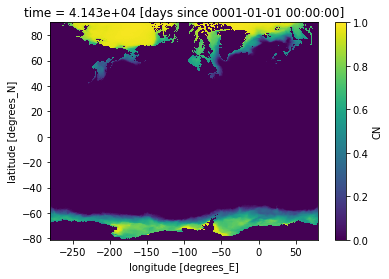

In [15]:
pert_01_cn[0].plot()

In [16]:
pert_01_cn_ann_area=pert_01_cn*area_t

[2000]
[0.2]


Text(0.5, 0, 'Ice Area')

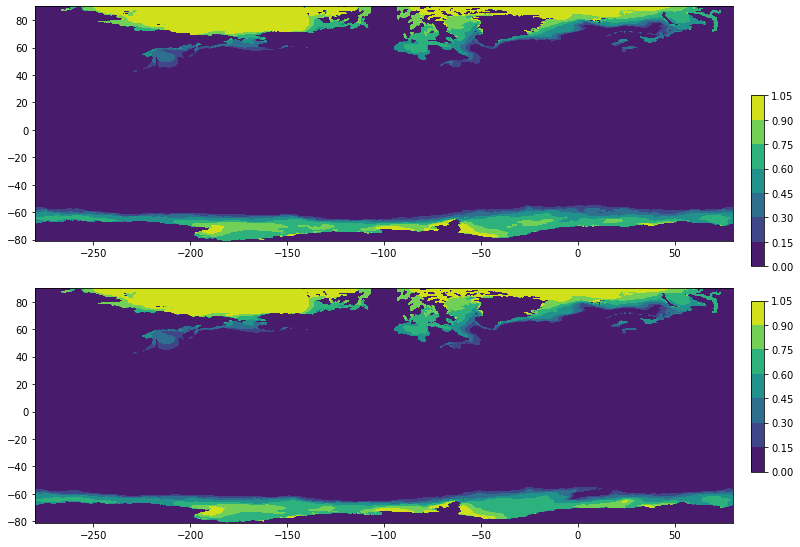

In [17]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('b) MOM025_NoNP')

clev3 = np.arange(2000,2001,1000)
print(clev3)

clev2 = np.arange(0.20,0.21,1)
print(clev2)
        
plt.subplot(2,1,1)
plt.gca().patch.set_color('.75')
p1=plt.contourf(xt_ocean,yt_ocean,pert_01_cn[0])

ax3 = plt.axes([0.92,0.5,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Ice Conc')

plt.subplot(2,1,2)
plt.gca().patch.set_color('.75')
p1=plt.contourf(xt_ocean,yt_ocean,pert_01_cn[2])

ax3 = plt.axes([0.92,0.2,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Ice Area')



In [18]:
#-44.19977917334686 -62.375 39.125
#-44.19977917334686 -62.375 39.125
lat_ind1 = np.abs(yt_ocean - -44.2).argmin()
lon_ind1 = np.abs(xt_ocean - -39.5).argmin()
lon_ind2 = np.abs(xt_ocean - 20.5).argmin()
print(yt_ocean[lat_ind1],xt_ocean[lon_ind1],xt_ocean[lon_ind2])
pert_01_cn_ann_area_wed=np.sum(np.sum(pert_01_cn_ann_area[:,0:lat_ind1,lon_ind1:lon_ind2],axis=2),axis=1)/1000/1000
pert_01_cn_ann_area_wed.shape

-44.18179490046996 -39.45000000000512 20.549999999995194


(40,)

In [19]:
#last year is an incomplete, bad avg
pert_01_cn_ann_area_wed

<xarray.DataArray 'CN' (time: 40)>
array([2734915.5, 2359977.5, 2389262.5, 2606870.8, 2858010.2, 2934519.5,
       2952655.8, 3000503.2, 3052606.5, 3086136.8, 3079611.8, 3083314.8,
       3065261.8, 3070932.5, 3068507.2, 3072435.2, 3050404.8, 3042555.5,
       3035653.8, 3028656.8, 3035091.2, 3030807.2, 3041748. , 3047882. ,
       3049418.8, 3046663.2, 3043135.2, 3039255.5, 3041335.5, 3040495.5,
       3052911.5, 3043330.2, 3035164.8, 3048758.2, 2572791.5, 3046556. ,
       3037464. , 3037062. , 3038223.2, 4738127. ], dtype=float32)
Coordinates:
  * time     (time) float64 4.143e+04 4.179e+04 ... 5.548e+04 5.571e+04

In [20]:
#control starts in 1970, pert in 1973 ... make both start in 1970
print(cntrl_01_cn_ann_area_wed.shape,pert_01_cn_ann_area_wed.shape)
#tmp=np.zeros((50,1))
pert_01_cn_ann_area_wed=np.concatenate((cntrl_01_cn_ann_area_wed[0:3],pert_01_cn_ann_area_wed[:]))
pert_01_cn_ann_area_wed.shape

(17,) (40,)


(43,)

In [21]:
fo='/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/pert_01_cn_ann_area_wed_1970'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fo)
np.save(fo,pert_01_cn_ann_area_wed.data)

/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/pert_01_cn_ann_area_wed_19702405_3005.npy


In [22]:
#lost control ice data ... bad rsync to gdata ... loop it
tmp=np.zeros((43))
tmp[0:17]=np.squeeze(cntrl_01_cn_ann_area_wed)
tmp[17:34]=np.flip(cntrl_01_cn_ann_area_wed)
tmp[34:43]=cntrl_01_cn_ann_area_wed[4:13]

In [23]:
cntrl_01_cn_ann_area_wed=tmp

In [33]:
fo='/g/data3/hh5/tmp/pas561/kds75_cp/cntrl_01_cn_ann_area_wed_1970'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fo)
np.save(fo,cntrl_01_cn_ann_area_wed)

/g/data3/hh5/tmp/pas561/kds75_cp/cntrl_01_cn_ann_area_wed_19702405_3005.npy


In [6]:
fi='/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/pert_01_cn_ann_area_wed_1970'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fi)
pert_tmp=np.load(fi)

NameError: name 'lon_ind1' is not defined

In [35]:
pert_tmp

array([2977365.8, 2984088.2, 2988234. , 2734915.5, 2359977.5, 2389262.5,
       2606870.8, 2858010.2, 2934519.5, 2952655.8, 3000503.2, 3052606.5,
       3086136.8, 3079611.8, 3083314.8, 3065261.8, 3070932.5, 3068507.2,
       3072435.2, 3050404.8, 3042555.5, 3035653.8, 3028656.8, 3035091.2,
       3030807.2, 3041748. , 3047882. , 3049418.8, 3046663.2, 3043135.2,
       3039255.5, 3041335.5, 3040495.5, 3052911.5, 3043330.2, 3035164.8,
       3048758.2, 2572791.5, 3046556. , 3037464. , 3037062. , 3038223.2,
       4738127. ], dtype=float32)

In [38]:
fi='/g/data3/hh5/tmp/pas561/kds75_cp/cntrl_01_cn_ann_area_wed_1970'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
cntrl_tmp=np.load(fi)

<Figure size 504x576 with 0 Axes>

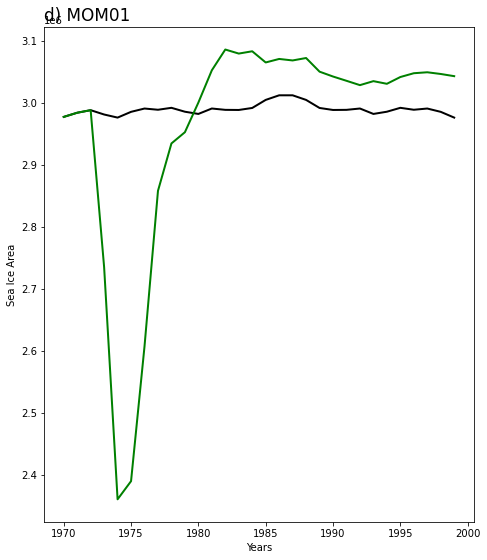

In [39]:
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

fontsize=14

plt.figure(figsize(7,8))

plt.subplots(1, 1)
plt.rcParams['font.size'] = fontsize

yrs=np.arange(1970,2020,1)

plt.plot(yrs[0:30],cntrl_tmp[0:30],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:30],pert_tmp[0:30],linestyle='-',color='g',label='MOM01',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Sea Ice Area')
plt.xlabel('Years')
tit='d) MOM01'
plt.title(tit,loc='left')

plt.tight_layout()

#of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig3c_CN.png'
#plt.savefig(of,dpi=220)

#cbaxes = fig.add_axes([0.95,0.5,0.015,0.2]) 
#cb=fig.colorbar(pcm, ax=axs[0:2],cax=cbaxes,ticks=tick_lvls, shrink=0.6)
#cb.ax.set_xlabel('Conc.')



In [51]:
#Do HaddISST

In [52]:
# HadISST annual mean sea ice data starting in 1870
ice_file ='/g/data/v45/pas561/mom/archive/wp2_figs/HadISST_ice.cat.ann.nc'
hadisst=xr.open_dataset(ice_file,engine='netcdf4',decode_times=False)
print(hadisst.sic.shape, hadisst.latitude.shape, hadisst.longitude.shape)
hadisst.sic

(150, 180, 360) (180,) (360,)


<xarray.DataArray 'sic' (time: 150, latitude: 180, longitude: 360)>
[9720000 values with dtype=float32]
Coordinates:
  * time       (time) float32 182.0 547.0 912.8 ... 5.421e+04 5.424e+04
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Monthly 1 degree resolution sea ice concentration
    units:          1
    cell_methods:   time: lat: lon: median time: mean

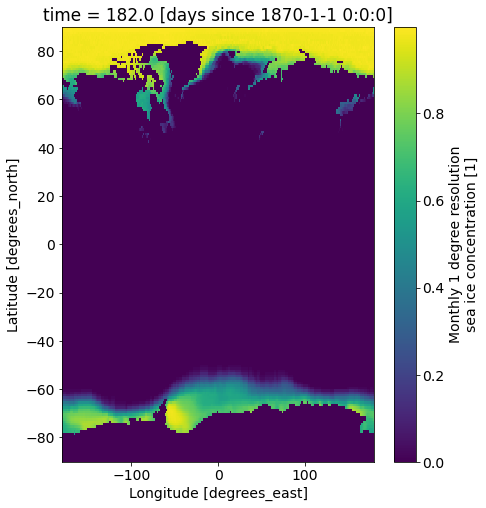

In [53]:
hadisst.sic[0].fillna(0).plot()

In [54]:
import scipy.io
hadisst_area = scipy.io.loadmat('/home/561/pas561/gdv45/mom/archive/wp2_figs/HaddSST_ice_area.mat')["area"]
print(hadisst_area.shape)
np.sum(np.sum(hadisst_area))/1E14

(360, 180)


5.1007663910016

In [55]:
np.sum(np.sum(area_t))/1E14

5.07014111297536

In [56]:
tmp=np.transpose(hadisst_area)
tmp.shape

(180, 360)

In [57]:
#data till 2019 starting in 1870
#tmp=np.array(np.split(hadisst.sic[0:1788].fillna(0),12))
#print(tmp.shape)
#hadi_cn_ann=np.mean(tmp,axis=0)
hadi_cn_ann_area=np.array(hadisst.sic.fillna(0))*np.transpose(hadisst_area)
print(hadi_cn_ann_area.shape)

(150, 180, 360)


In [58]:
#tmp=np.sum(np.sum(hadi_cn_ann_area,axis=2),axis=1)
#tmp

In [59]:
#-44.19977917334686 -62.375 39.125
print(yt_ocean[750],xt_ocean[2176],xt_ocean[3191])
print(hadisst.latitude[130],hadisst.longitude[117],hadisst.longitude[220])
print(hadisst.latitude[130],hadisst.longitude[150],hadisst.longitude[208])

-44.25346444070827 -62.35000000000548 39.14999999999545
<xarray.DataArray 'latitude' ()>
array(-40.5, dtype=float32)
Coordinates:
    latitude  float32 -40.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude <xarray.DataArray 'longitude' ()>
array(-62.5, dtype=float32)
Coordinates:
    longitude  float32 -62.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude <xarray.DataArray 'longitude' ()>
array(40.5, dtype=float32)
Coordinates:
    longitude  float32 40.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude
<xarray.DataArray 'latitude' ()>
array(-40.5, dtype=float32)
Coordinates:
    latitude  float32 -40.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude <xarray.DataArray 'longitude' ()>
array(-29.5, dtype=float32)
Coordinates:
    longitude  float32 -29.5
Attributes:


In [60]:
hadisst.latitude[130:]

<xarray.DataArray 'latitude' (latitude: 50)>
array([-40.5, -41.5, -42.5, -43.5, -44.5, -45.5, -46.5, -47.5, -48.5, -49.5,
       -50.5, -51.5, -52.5, -53.5, -54.5, -55.5, -56.5, -57.5, -58.5, -59.5,
       -60.5, -61.5, -62.5, -63.5, -64.5, -65.5, -66.5, -67.5, -68.5, -69.5,
       -70.5, -71.5, -72.5, -73.5, -74.5, -75.5, -76.5, -77.5, -78.5, -79.5,
       -80.5, -81.5, -82.5, -83.5, -84.5, -85.5, -86.5, -87.5, -88.5, -89.5],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -40.5 -41.5 -42.5 -43.5 ... -87.5 -88.5 -89.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude

In [61]:
hadisst.longitude[117:220]

<xarray.DataArray 'longitude' (longitude: 103)>
array([-62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5,
       -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5,
       -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5,
       -32.5, -31.5, -30.5, -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5,
       -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5,
       -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,
        -2.5,  -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,
         7.5,   8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
        17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,
        37.5,  38.5,  39.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -62.5 -61.5 -60.5 -59.5 ... 37.5 38.5 39.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude

In [62]:
#-44.19977917334686 -62.375 39.125
print(yt_ocean[750],xt_ocean[2176],xt_ocean[3191])
print(hadisst.latitude[130],hadisst.longitude[117],hadisst.longitude[220])
print(hadisst.latitude[130],hadisst.longitude[140],hadisst.longitude[200])

-44.25346444070827 -62.35000000000548 39.14999999999545
<xarray.DataArray 'latitude' ()>
array(-40.5, dtype=float32)
Coordinates:
    latitude  float32 -40.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude <xarray.DataArray 'longitude' ()>
array(-62.5, dtype=float32)
Coordinates:
    longitude  float32 -62.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude <xarray.DataArray 'longitude' ()>
array(40.5, dtype=float32)
Coordinates:
    longitude  float32 40.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude
<xarray.DataArray 'latitude' ()>
array(-40.5, dtype=float32)
Coordinates:
    latitude  float32 -40.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude <xarray.DataArray 'longitude' ()>
array(-39.5, dtype=float32)
Coordinates:
    longitude  float32 -39.5
Attributes:


In [63]:
lat_ind1 = np.abs(hadisst.latitude - -44.2).argmin().data
lon_ind1 = np.abs(hadisst.longitude - -39.5).argmin().data
lon_ind2 = np.abs(hadisst.longitude - 20.5).argmin().data
print(hadisst.latitude[lat_ind1],hadisst.longitude[lon_ind1],hadisst.longitude[lon_ind2])

<xarray.DataArray 'latitude' ()>
array(-44.5, dtype=float32)
Coordinates:
    latitude  float32 -44.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude <xarray.DataArray 'longitude' ()>
array(-39.5, dtype=float32)
Coordinates:
    longitude  float32 -39.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude <xarray.DataArray 'longitude' ()>
array(20.5, dtype=float32)
Coordinates:
    longitude  float32 20.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude


In [64]:
print(lat_ind1,lon_ind1,lon_ind2)

134 140 200


In [65]:
hadi_cn_ann_area_wed=np.sum(np.sum(hadi_cn_ann_area[:,lat_ind1:,lon_ind1:lon_ind2],axis=2),axis=1)/1000/1000
hadi_cn_ann_area_wed.shape

(150,)

In [66]:
#1970:1979 starts in 1870
hadi_cn_ann_area_wed[101:111]

array([2453935.75777098, 2431208.11355919, 2926607.43148159,
       2437325.63281815, 2141363.3432036 , 1964655.31662927,
       1920023.5443902 , 2460423.86650723, 2712258.44310174,
       2751809.15363412])

In [67]:
fo='/home/561/pas561/gdv45/mom/archive/wp2_figs/hadi_cn_ann_area_wed_'+str(lon_ind1)+'_'+str(lon_ind2)+'.npy'
print(fo)
np.save(fo,hadi_cn_ann_area_wed)

/home/561/pas561/gdv45/mom/archive/wp2_figs/hadi_cn_ann_area_wed_140_200.npy


In [4]:
fi='/home/561/pas561/gdv45/mom/archive/wp2_figs/hadi_cn_ann_area_wed_140_200.npy'
print(fi)

hadi=np.load(fi)

/home/561/pas561/gdv45/mom/archive/wp2_figs/hadi_cn_ann_area_wed_140_200.npy


In [5]:
fi='/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/pert_01_cn_ann_area_wed_19702405_3005.npy'
print(fi)
pert_01=np.load(fi)

/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/pert_01_cn_ann_area_wed_19702405_3005.npy


In [6]:
fi='/g/data3/hh5/tmp/pas561/kds75_cp/cntrl_01_cn_ann_area_wed_19702405_3005.npy'
cntrl_01=np.load(fi)

In [7]:
fi='/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/pert_np_cn_ann_area_wed_1970_961_1201.npy'
pert_np=np.load(fi)

In [8]:
fi='/g/data/v45/pas561/mom/archive/wombat_jun16z/cntrl_np_cn_ann_area_wed_1970_961_1201.npy'
print(fi)
cntrl_np=np.load(fi)

/g/data/v45/pas561/mom/archive/wombat_jun16z/cntrl_np_cn_ann_area_wed_1970_961_1201.npy


In [9]:
print(cntrl_01.shape)

(43,)


In [10]:
print(hadi.shape)

(150,)


2015


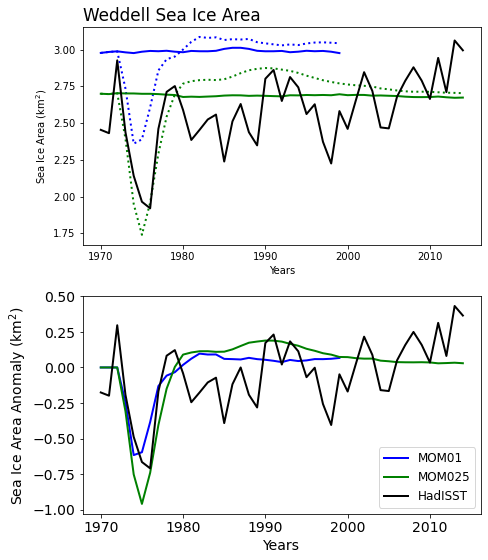

In [11]:
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

fontsize=14

plt.figure(figsize(7,8))

plt.subplot(211)
plt.rcParams['font.size'] = fontsize

yrs=np.arange(1970,2021,1)
print(yrs[45])
      
plt.plot(yrs[0:30],cntrl_01[0:30]/1E6,linestyle='-',color='b',linewidth=2)
plt.plot(yrs[0:30],pert_01[0:30]/1E6,linestyle=':',color='b',label='MOM01',linewidth=2)
plt.plot(yrs[0:45],cntrl_np[0:45]/1E6,linestyle='-',color='g',linewidth=2)
plt.plot(yrs[0:45],pert_np[0:45]/1E6,linestyle=':',color='g',label='MOM025',linewidth=2)
plt.plot(yrs[0:45],hadi[101:146]/1E6,linestyle='-',color='k',label='HadISST',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Sea Ice Area (km$^2$)')
plt.xlabel('Years')
tit='Weddell Sea Ice Area'
plt.title(tit,loc='left')

plt.subplot(212)
plt.rcParams['font.size'] = fontsize

yrs=np.arange(1970,2020,1)

plt.plot(yrs[0:30],(pert_01[0:30]-cntrl_01[0:30])/1E6,linestyle='-',color='b',label='MOM01',linewidth=2)
plt.plot(yrs[0:45],(pert_np[0:45]-cntrl_np[0:45])/1E6,linestyle='-',color='g',label='MOM025',linewidth=2)
plt.plot(yrs[0:45],(hadi[101:146]-np.mean(hadi[111:146]))/1E6,linestyle='-',color='k',label='HadISST',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Sea Ice Area Anomaly (1E6 km$^2$) ')
plt.xlabel('Years')
#plt.title(tit,loc='left')
plt.legend(fontsize=12)

plt.tight_layout()


In [16]:
np.mean((pert_01[4:7]-cntrl_01[4:7])/1E6)

-0.5321815000000001

In [20]:
np.mean((pert_np[4:7]-cntrl_np[4:7])/1E6)

-0.8174098

In [25]:
np.mean((hadi[105:108]-np.mean(hadi[111:146]))/1E6)

-0.6210281905261215